# Q- 1
## Part-1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import seaborn as sns


from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [4]:
df=pd.read_csv('city_day.csv',parse_dates=['Date'])
raw_df = df

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [7]:
# Fill missing values with median for numerical columns
columns_to_fill_median = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
                          'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

for col in columns_to_fill_median:
    df[col] = df[col].fillna(df[col].median())

# Fill missing values for categorical column
df['AQI_Bucket'] = df['AQI_Bucket'].fillna('Moderate')

# Create a copy of the DataFrame
df1 = df

# Display the first few rows
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,Moderate
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,Moderate
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,Moderate
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,Moderate
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,Moderate


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-null  object        
dtypes: datetime64[ns](1), 

<ipython-input-9-056e3295ab6e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot1 = sns.catplot(


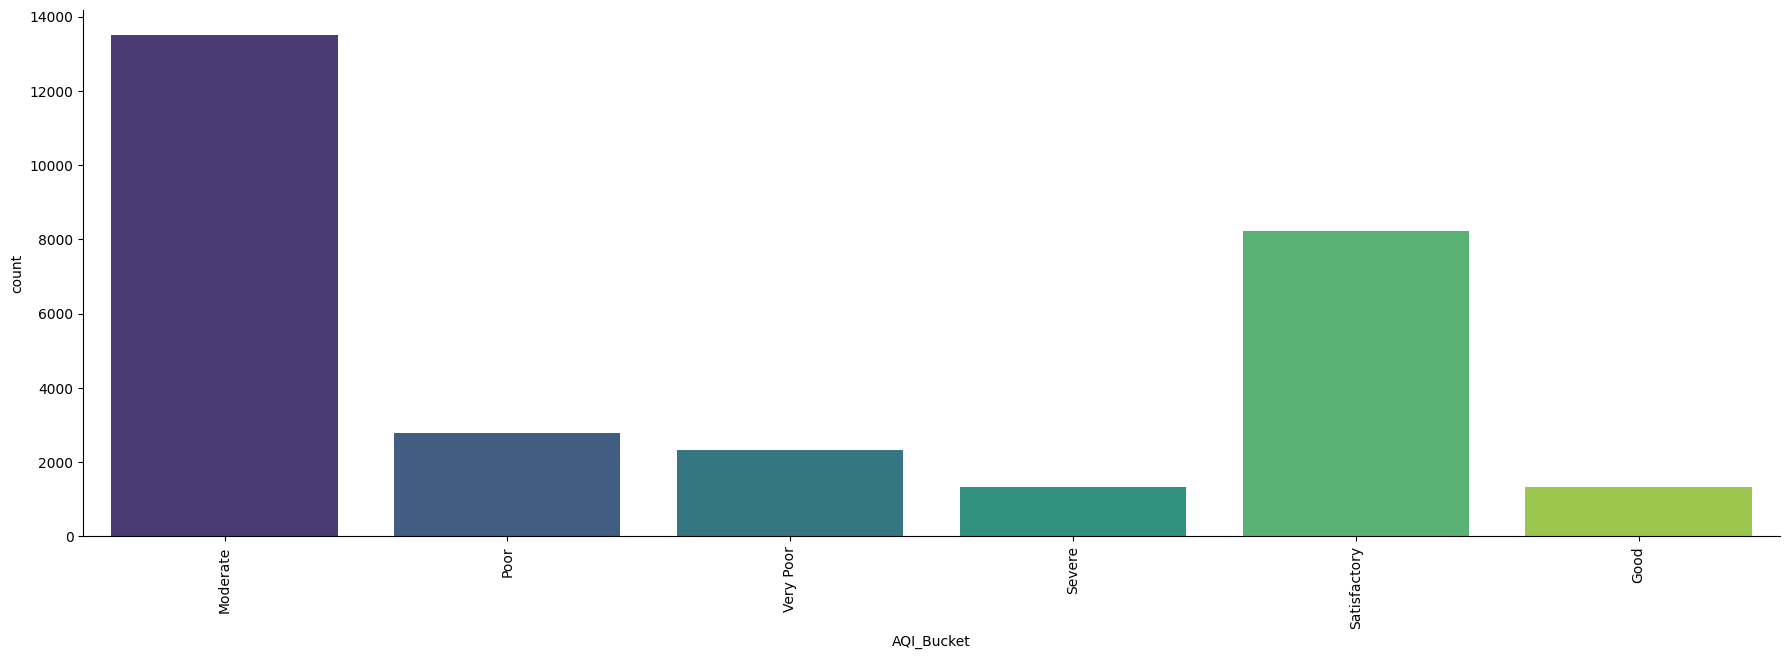

In [9]:
plot1 = sns.catplot(
    x="AQI_Bucket",
    data=df1,
    kind="count",
    height=6,
    aspect=3,
    palette="viridis"  # Example of a color palette
)
plot1.set_xticklabels(rotation=90)

# Show the plot
plt.show()

## Part-2


Here’s a structured breakdown of how to address the questions in each section with insights, methods, and key considerations:

---

### **A) Investigating the Impact of COVID-19 on Air Pollution**  
**Approach:**  
1. **Pre- and Post-COVID Period Comparison:**  
   - Define pre-COVID (e.g., January 2015–March 2020) and post-COVID (e.g., April 2020–July 2020) periods.  
   - Calculate average pollutant levels (PM2.5, PM10, NO, NO2, NOx, etc.) for each period.  
   - Use statistical tests (e.g., paired t-tests) to determine significant differences.  

2. **AQI Trends Across Cities:**  
   - Visualize AQI changes over time using line plots for major cities.  
   - Compare AQI during lockdown phases (strict vs. relaxed) to identify trends.  

3. **Lockdowns and Policies:**  
   - Correlate major lockdown phases with pollutant reductions.  
   - Identify regions with sharp declines or rebounds in pollutants and link to specific policies/events.

**Key Insights to Derive:**  
- Clear reductions in pollutants like NOx and PM2.5 during strict lockdown phases.  
- Cities with substantial industrial activity may show varied trends.  

---

### **B) Identifying the Most and Least Polluted Cities**  
**Approach:**  
1. **Vehicular vs. Industrial Pollution:**  
   - Rank cities by average levels of **vehicular pollutants** (NO, NO2, NOx, CO).  
   - Rank cities by **industrial pollutants** (SO2, Benzene, Toluene, Xylene).  

2. **Geographical and Socioeconomic Patterns:**  
   - Use maps to visualize pollution hotspots and clean zones.  
   - Analyze correlations with factors like industrial density, population, and income levels.  

**Key Insights to Derive:**  
- Northern cities may experience higher pollution due to winter stubble burning and vehicle emissions.  
- Industrial pollution hotspots could align with regions with significant manufacturing activities.  

---

### **C) Exploring Relationships and Trends**  
**Approach:**  
1. **Pollutant Correlation Analysis:**  
   - Compute correlation coefficients (Pearson/Spearman) between pollutants (e.g., NOx and PM10).  
   - Visualize using a heatmap to identify strong correlations.  

2. **Seasonal Variations:**  
   - Analyze pollutant levels and AQI across seasons (winter, summer, monsoon).  
   - Compare pollution peaks during specific months (e.g., Diwali in Northern India).  

3. **Other Factors:**  
   - Incorporate meteorological data (temperature, wind patterns) and socioeconomic data (population, GDP).  
   - Perform regression analysis to identify key predictors of pollution levels.  

**Key Insights to Derive:**  
- Winter may show higher AQI levels due to inversion layers.  
- Positive correlations between NOx and PM2.5 indicate vehicular pollution as a shared source.

---

### **D) Identifying Opportunities for Improvement**  
**Approach:**  
1. **Promising Cities:**  
   - Identify cities with declining pollution trends.  
   - Link improvements to interventions like public transport enhancements, cleaner fuels, or industrial shifts.  

2. **Prioritization for Action:**  
   - Identify cities and pollutants with the worst trends for targeted actions.  
   - Suggest localized solutions (e.g., EV adoption in vehicle-polluted cities, stricter industrial controls elsewhere).  

3. **Policy Recommendations:**  
   - Encourage stricter emission norms (BS-VI vehicles).  
   - Expand air quality monitoring networks.  
   - Promote public awareness campaigns.  

**Key Insights to Derive:**  
- Cities with proactive interventions show measurable improvements.  
- Prioritizing vehicular emissions in metro cities and industrial controls in smaller cities could yield significant benefits.  

In [10]:

# Read the dataset
df = pd.read_csv('city_day.csv', parse_dates=['Date'])

# Fill missing values with median
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
              'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
for pollutant in pollutants:
    df[pollutant] = df[pollutant].fillna(df[pollutant].median())

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Split data into pre-COVID and post-COVID periods
pre_covid = df[df['Date'] <= '2020-03-25']
post_covid = df[df['Date'] > '2020-03-25']


In [11]:
# Question A: Impact of COVID-19 on Air Pollution
def compare_pollution_levels(pre_data, post_data):
    pollutant_groups = {
        'Vehicular': ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO'],
        'Industrial': ['SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
    }

    results = {}

    for group, pollutants in pollutant_groups.items():
        pre_levels = pre_data[pollutants].mean()
        post_levels = post_data[pollutants].mean()

        # Calculate percentage change
        percent_changes = ((post_levels - pre_levels) / pre_levels * 100).round(2)

        # Perform t-test to check statistical significance
        t_test_results = {}
        for pollutant in pollutants:
            t_stat, p_val = stats.ttest_ind(pre_data[pollutant], post_data[pollutant])
            t_test_results[pollutant] = {
                'p_value': p_val,
                'statistically_significant': p_val < 0.05
            }

        results[group] = {
            'pre_levels': pre_levels.to_dict(),
            'post_levels': post_levels.to_dict(),
            'percent_changes': percent_changes.to_dict(),
            't_test_results': t_test_results
        }

    return results

In [12]:
# Question B: Most and Least Polluted Cities
def analyze_city_pollution(data):
    pollutant_groups = {
        'Vehicular': ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO'],
        'Industrial': ['SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
    }

    city_pollution = {}

    for group, pollutants in pollutant_groups.items():
        city_avg = data.groupby('City')[pollutants].mean()
        total_pollution = city_avg.sum(axis=1)

        city_pollution[group] = {
            'most_polluted': total_pollution.nlargest(5).to_dict(),
            'least_polluted': total_pollution.nsmallest(5).to_dict()
        }

    return city_pollution

In [13]:
# Question C: Correlations and Trends
def analyze_correlations(data):
    pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
                  'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

    correlation_matrix = data[pollutants].corr()

    # Seasonal analysis
    data['Month'] = data['Date'].dt.month
    seasonal_avg = data.groupby('Month')[pollutants].mean()

    return {
        'correlation_matrix': correlation_matrix,
        'seasonal_averages': seasonal_avg
    }


In [14]:
def analyze_improvements(data):
    import pandas as pd

    # Define pollutant groups
    pollutant_groups = {
        'Vehicular': ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO'],
        'Industrial': ['SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
    }

    # Ensure 'Date' column is in datetime format and extract the year
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    data['Year'] = data['Date'].dt.year

    # Group by city and year, calculating the mean pollutant levels
    yearly_city_pollution = data.groupby(['City', 'Year'])[pollutant_groups['Vehicular'] + pollutant_groups['Industrial']].mean()

    # Initialize a dictionary to store improvements
    improvements = {}

    # Calculate year-over-year improvements for each pollutant group
    for group, pollutants in pollutant_groups.items():
        improvements[group] = {}
        for city in data['City'].dropna().unique():
            if city in yearly_city_pollution.index.get_level_values(0):
                city_data = yearly_city_pollution.loc[city]
                if len(city_data) > 1:
                    # Compute percentage improvement (earliest vs latest year)
                    first_year = city_data.iloc[0]
                    last_year = city_data.iloc[-1]
                    improvement = ((first_year - last_year) / first_year) * 100
                    improvements[group][city] = improvement.round(2).to_dict()

    return improvements


In [15]:
def compare_pollution_levels(pre_covid, post_covid):
    import pandas as pd

    # Define pollutant groups
    pollutant_groups = {
        'Vehicular': ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO'],
        'Industrial': ['SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
    }

    # Store results for each pollutant group
    impact = {}

    for group, pollutants in pollutant_groups.items():
        pre_avg = pre_covid[pollutants].mean()
        post_avg = post_covid[pollutants].mean()

        # Calculate percentage changes
        percent_changes = ((post_avg - pre_avg) / pre_avg) * 100
        impact[group] = {
            'pre_covid_avg': pre_avg.round(2),
            'post_covid_avg': post_avg.round(2),
            'percent_changes': percent_changes.round(2)
        }

    return impact


# Display results
covid_impact = compare_pollution_levels(pre_covid, post_covid)

print("COVID Impact on Pollution Levels:")
for group, data in covid_impact.items():
    print(f"\n{group} Pollution:")
    print("Pre-COVID Averages:", data['pre_covid_avg'].to_dict())
    print("Post-COVID Averages:", data['post_covid_avg'].to_dict())
    print("Changes in Percent:", data['percent_changes'].to_dict())


COVID Impact on Pollution Levels:

Vehicular Pollution:
Pre-COVID Averages: {'PM2.5': 67.83, 'PM10': 113.47, 'NO': 16.98, 'NO2': 28.89, 'NOx': 32.19, 'NH3': 21.28, 'CO': 2.29}
Post-COVID Averages: {'PM2.5': 29.31, 'PM10': 69.36, 'NO': 13.04, 'NO2': 15.36, 'NOx': 19.08, 'NH3': 15.84, 'CO': 0.74}
Changes in Percent: {'PM2.5': -56.79, 'PM10': -38.88, 'NO': -23.22, 'NO2': -46.83, 'NOx': -40.72, 'NH3': -25.56, 'CO': -67.65}

Industrial Pollution:
Pre-COVID Averages: {'SO2': 14.15, 'O3': 33.97, 'Benzene': 2.89, 'Toluene': 7.35, 'Xylene': 1.83}
Post-COVID Averages: {'SO2': 10.41, 'O3': 34.28, 'Benzene': 2.54, 'Toluene': 4.93, 'Xylene': 1.37}
Changes in Percent: {'SO2': -26.48, 'O3': 0.94, 'Benzene': -12.25, 'Toluene': -32.95, 'Xylene': -24.99}


In [16]:
city_pollution = analyze_city_pollution(df)
city_pollution

{'Vehicular': {'most_polluted': {'Delhi': 536.8171777003485,
   'Patna': 335.7160548977395,
   'Gurugram': 334.4891244788565,
   'Kolkata': 326.19067567567566,
   'Ahmedabad': 299.59135390741665},
  'least_polluted': {'Aizawl': 86.6788495575221,
   'Shillong': 106.57387096774194,
   'Thiruvananthapuram': 112.00747302158273,
   'Coimbatore': 148.23945595854923,
   'Ernakulam': 154.1085802469136}},
 'Industrial': {'most_polluted': {'Ahmedabad': 106.50561971129916,
   'Shillong': 105.7351935483871,
   'Delhi': 87.98897959183674,
   'Bhopal': 76.91079584775086,
   'Patna': 73.25429494079656},
  'least_polluted': {'Kochi': 23.46771604938272,
   'Aizawl': 32.15725663716814,
   'Ernakulam': 36.26981481481481,
   'Brajrajnagar': 37.433283582089544,
   'Coimbatore': 38.51455958549223}}}

In [17]:
correlations = analyze_correlations(df)
correlations

{'correlation_matrix':             PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
 PM2.5    1.000000  0.520767  0.435245  0.358287  0.375938  0.164615  0.093695   
 PM10     0.520767  1.000000  0.433864  0.352396  0.416523  0.200548  0.023932   
 NO       0.435245  0.433864  1.000000  0.465848  0.747409  0.155804  0.221445   
 NO2      0.358287  0.352396  0.465848  1.000000  0.581938  0.151731  0.361750   
 NOx      0.375938  0.416523  0.747409  0.581938  1.000000  0.129433  0.231878   
 NH3      0.164615  0.200548  0.155804  0.151731  0.129433  1.000000 -0.014252   
 CO       0.093695  0.023932  0.221445  0.361750  0.231878 -0.014252  1.000000   
 SO2      0.120451  0.165468  0.174881  0.388413  0.205912 -0.048679  0.476784   
 O3       0.166064  0.208398  0.020788  0.289435  0.089095  0.076295  0.043311   
 Benzene  0.030539  0.027522  0.045202  0.042179  0.049004  0.004093  0.066022   
 Toluene  0.132609  0.126400  0.151930  0.297913  0.184764  0.020040  0.2855

In [18]:
improvement_opportunities = analyze_improvements(df)
# improvement_opportunities

## Part3

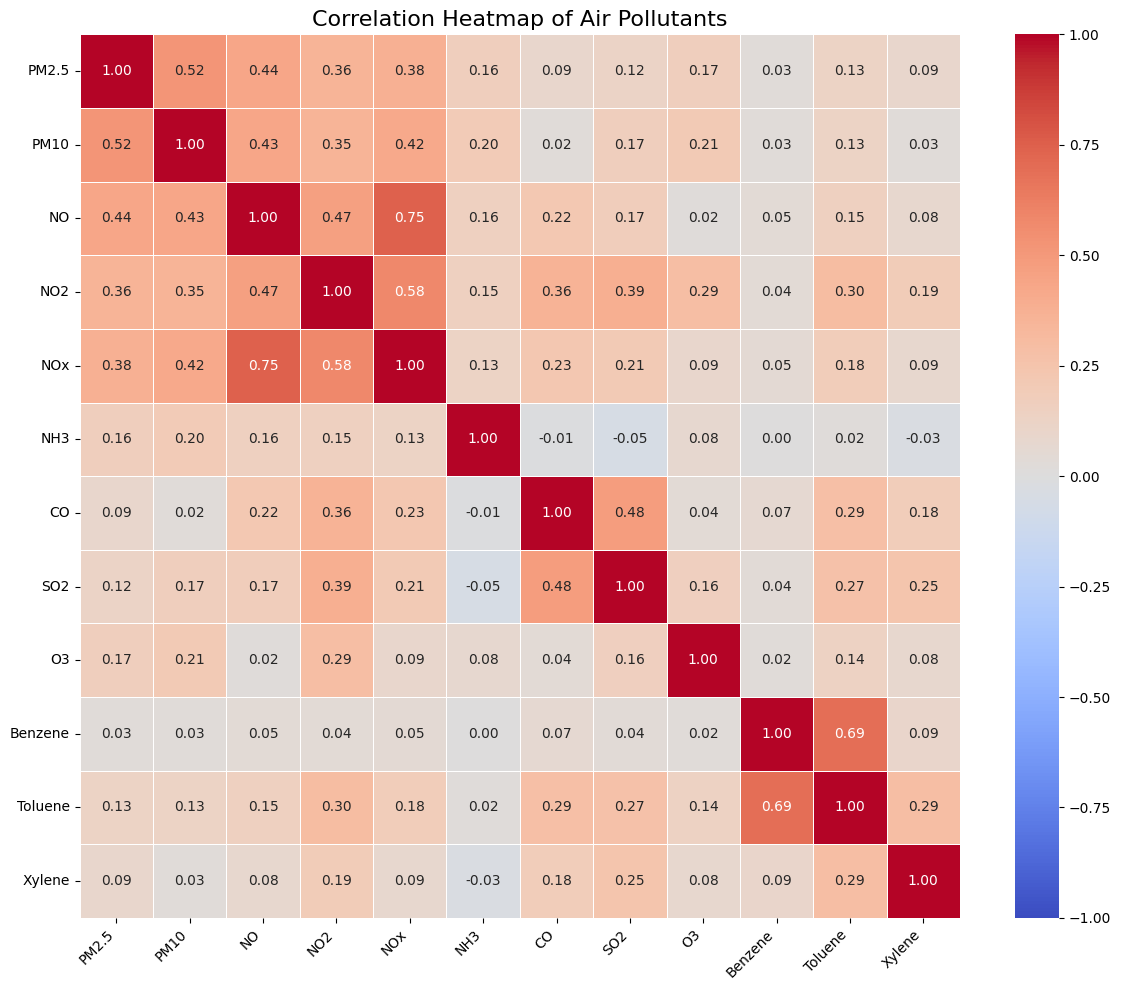

In [19]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Define the pollutants to include in the heatmap
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[pollutants].corr()
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    fmt=".2f",  # Format annotations to 2 decimal places
    linewidths=0.5  # Add spacing between cells
)
plt.title('Correlation Heatmap of Air Pollutants', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<ipython-input-20-f71c0138e866>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.groupby(pd.Grouper(key='Date', freq='M'))[major_pollutants].mean()


<Figure size 1500x800 with 0 Axes>

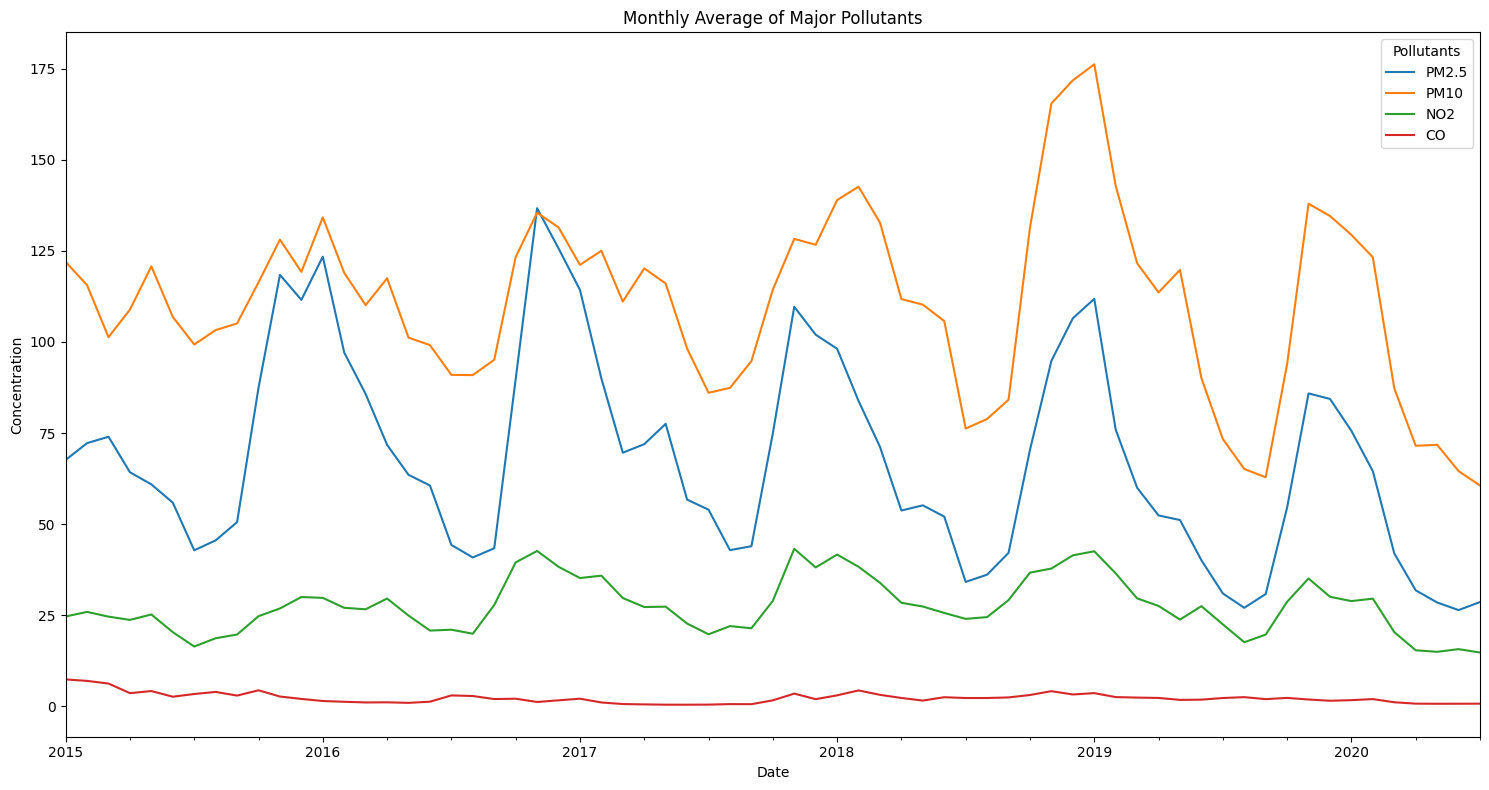

In [20]:
# 2. Time Series of Major Pollutants
plt.figure(figsize=(15, 8))
major_pollutants = ['PM2.5', 'PM10', 'NO2', 'CO']
df_monthly = df.groupby(pd.Grouper(key='Date', freq='M'))[major_pollutants].mean()
df_monthly.plot(figsize=(15,8))
plt.title('Monthly Average of Major Pollutants')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend(title='Pollutants')
plt.tight_layout()
plt.show()

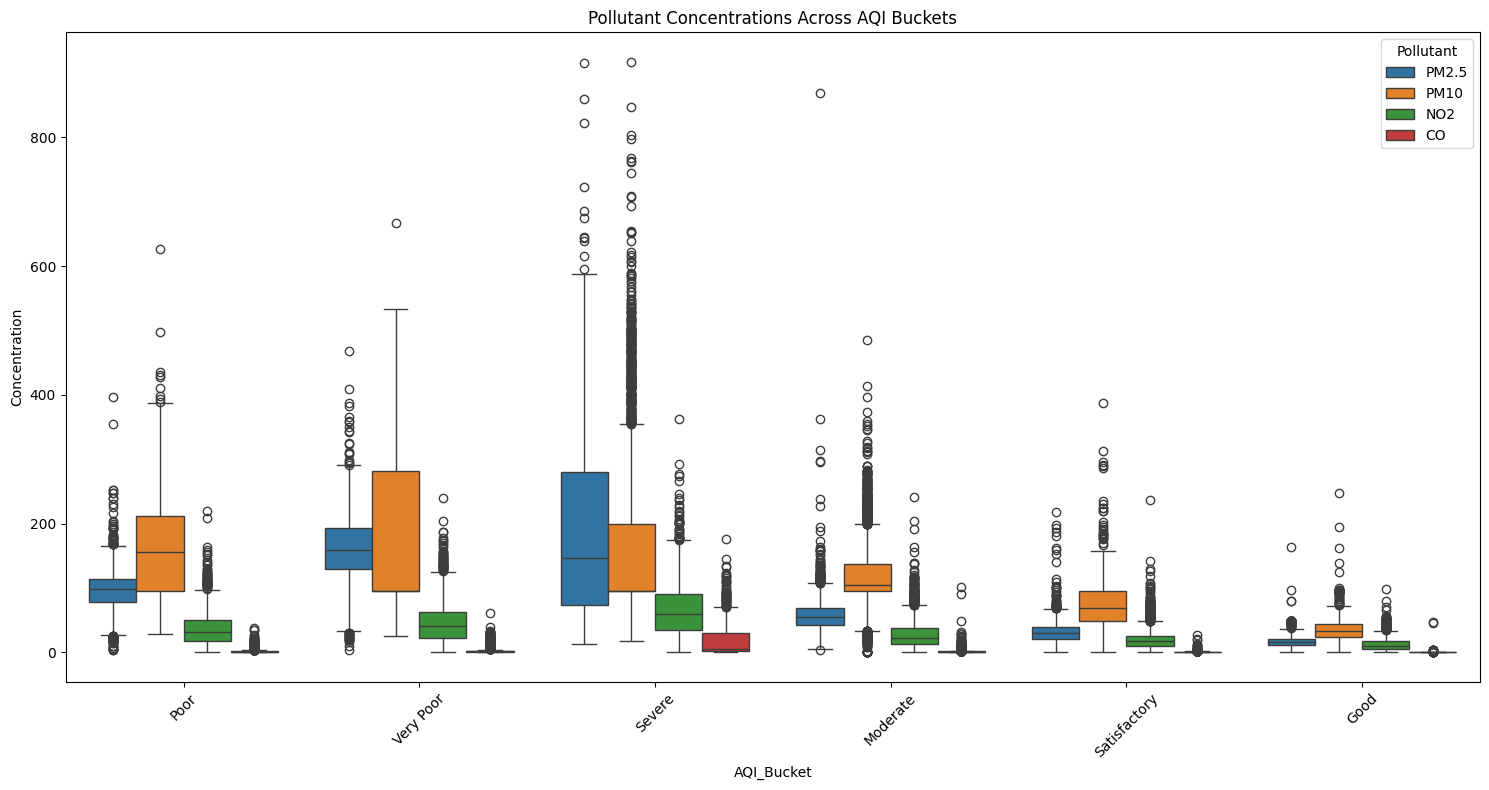

In [21]:
# 3. Box Plot of Pollutants by AQI Bucket
plt.figure(figsize=(15, 8))
df_melted = df.melt(id_vars=['AQI_Bucket'], value_vars=major_pollutants,
                    var_name='Pollutant', value_name='Concentration')
sns.boxplot(x='AQI_Bucket', y='Concentration', hue='Pollutant', data=df_melted)
plt.title('Pollutant Concentrations Across AQI Buckets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

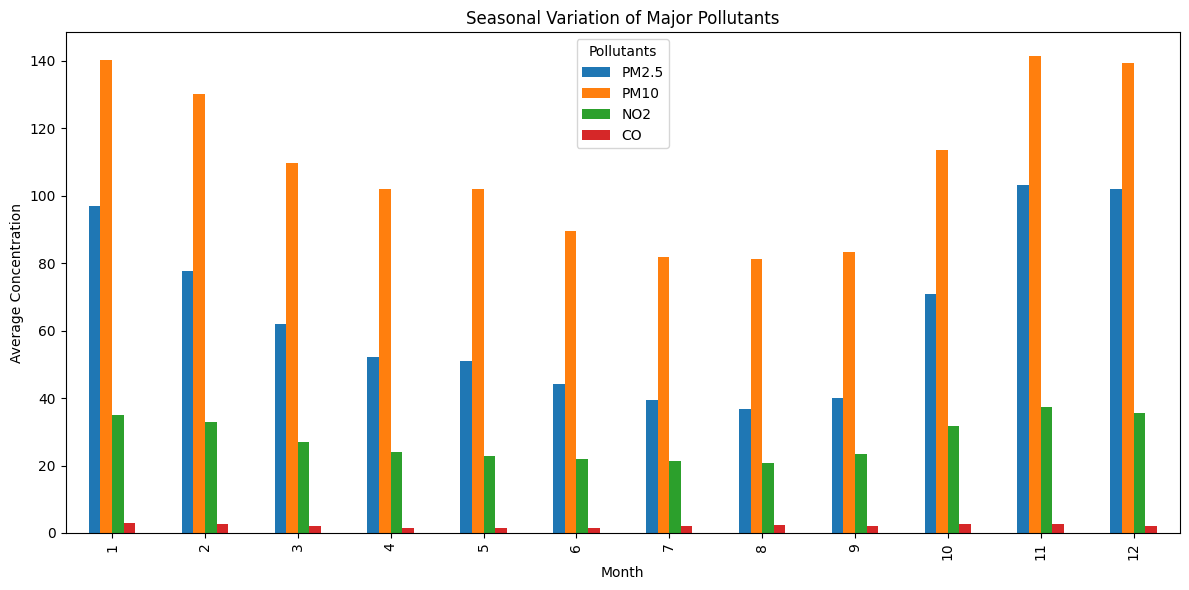

In [22]:
# 4. Seasonal Variation of Pollutants
df['Month'] = df['Date'].dt.month
seasonal_pollutants = df.groupby('Month')[major_pollutants].mean()

plt.figure(figsize=(12, 6))
seasonal_pollutants.plot(kind='bar', figsize=(12,6))
plt.title('Seasonal Variation of Major Pollutants')
plt.xlabel('Month')
plt.ylabel('Average Concentration')
plt.legend(title='Pollutants')
plt.tight_layout()
plt.show()

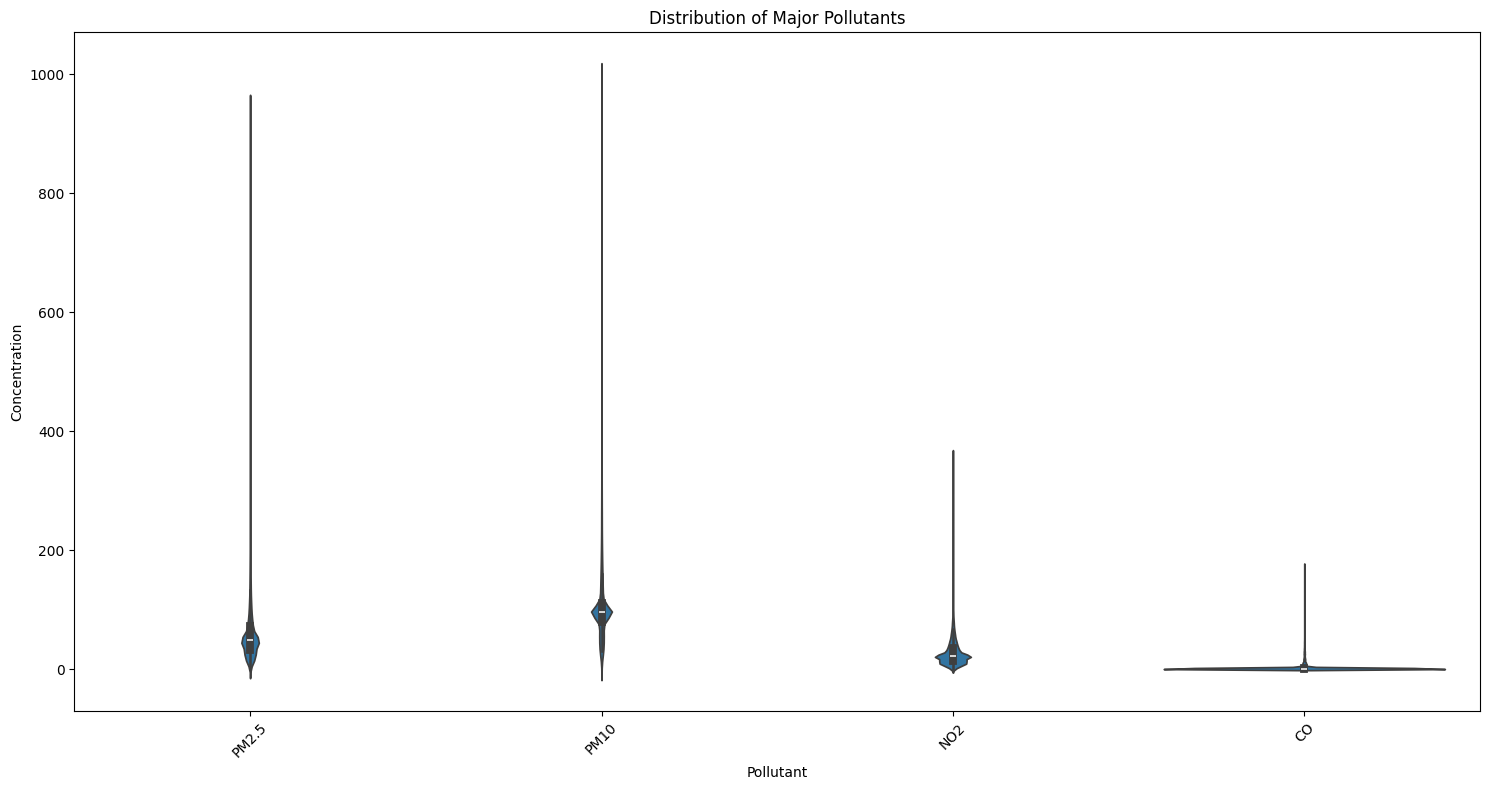

In [23]:
# 5. Violin Plot of Pollutant Distributions
plt.figure(figsize=(15, 8))
df_melted = df.melt(value_vars=major_pollutants,
                    var_name='Pollutant', value_name='Concentration')
sns.violinplot(x='Pollutant', y='Concentration', data=df_melted)
plt.title('Distribution of Major Pollutants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

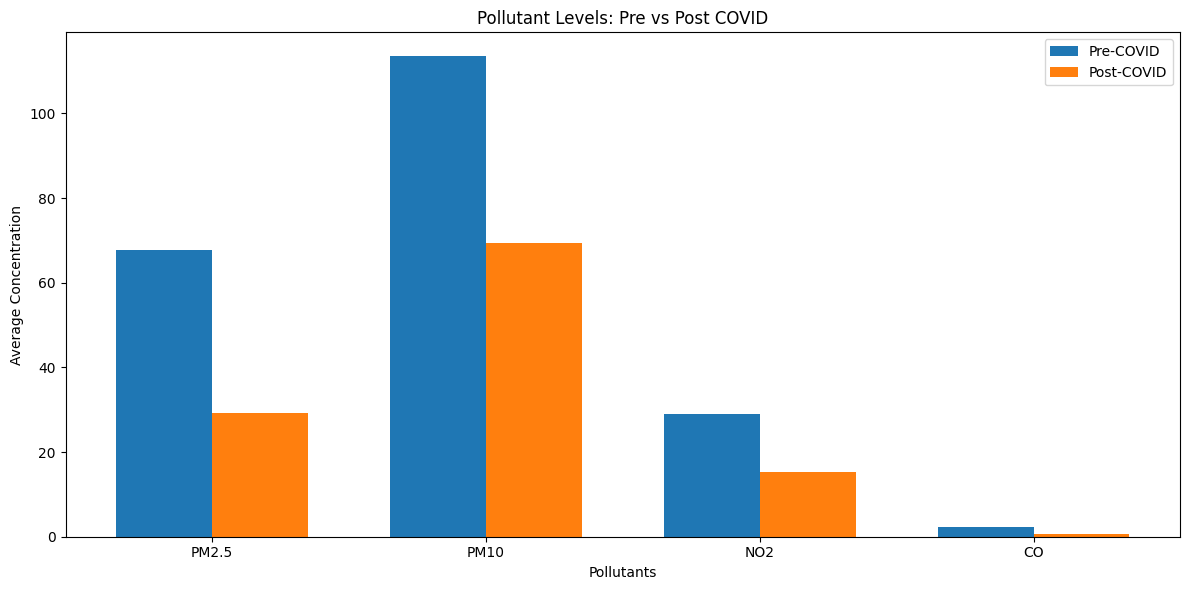

In [24]:
# 6. Pre vs Post COVID Pollution Comparison
pre_covid = df[df['Date'] <= '2020-03-25']
post_covid = df[df['Date'] > '2020-03-25']

plt.figure(figsize=(12, 6))
periods = ['Pre-COVID', 'Post-COVID']
pollutant_means = [
    pre_covid[major_pollutants].mean(),
    post_covid[major_pollutants].mean()
]

x = np.arange(len(major_pollutants))
width = 0.35

plt.bar(x - width/2, pollutant_means[0], width, label='Pre-COVID')
plt.bar(x + width/2, pollutant_means[1], width, label='Post-COVID')

plt.title('Pollutant Levels: Pre vs Post COVID')
plt.xlabel('Pollutants')
plt.ylabel('Average Concentration')
plt.xticks(x, major_pollutants)
plt.legend()
plt.tight_layout()

# Pre-Covid

In [25]:
df = df[df['Date'] <= ('25-03-2020')]
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26983 entries, 0 to 29432
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          26983 non-null  object        
 1   Date                          26983 non-null  datetime64[ns]
 2   AQI                           26983 non-null  float64       
 3   AQI_Bucket                    22447 non-null  object        
 4   Month                         26983 non-null  int32         
 5   Year                          26983 non-null  int32         
 6   Vehicular Pollution content   26983 non-null  float64       
 7   Industrial Pollution content  26983 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(2), object(2)
memory usage: 1.6+ MB


<ipython-input-25-231924519a81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
<ipython-input-25-231924519a81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']


In [26]:
df.head()

,City,Date,AQI,AQI_Bucket,Month,Year,Vehicular Pollution content,Industrial Pollution content
0,Ahmedabad,2015-01-01,118.0,NaN,1,2015,197.31,161.02
1,Ahmedabad,2015-01-02,118.0,NaN,1,2015,194.19,71.56
2,Ahmedabad,2015-01-03,118.0,NaN,1,2015,243.90,85.22
3,Ahmedabad,2015-01-04,118.0,NaN,1,2015,199.95,70.24
4,Ahmedabad,2015-01-05,118.0,NaN,1,2015,263.48,107.32


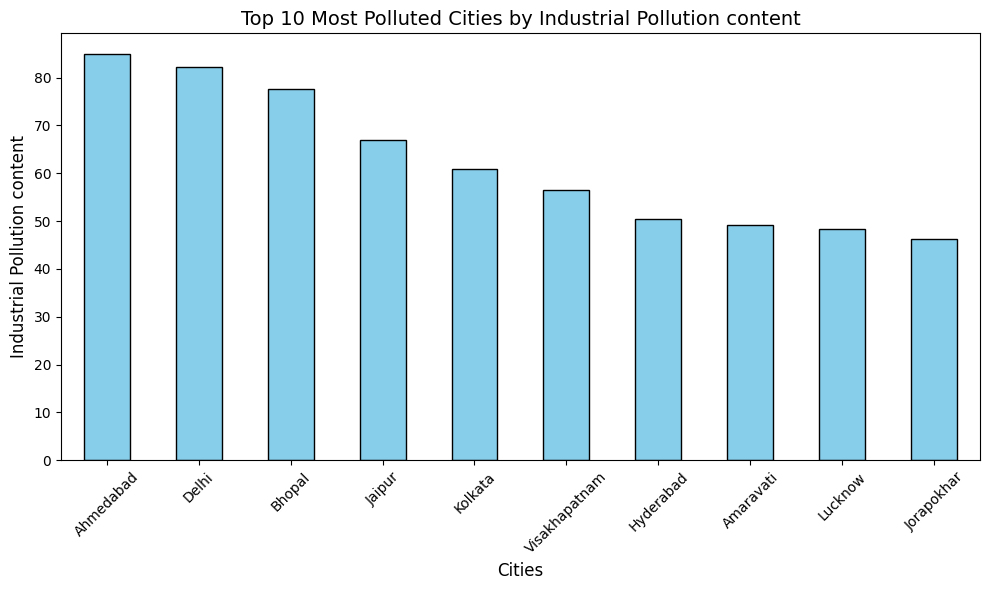

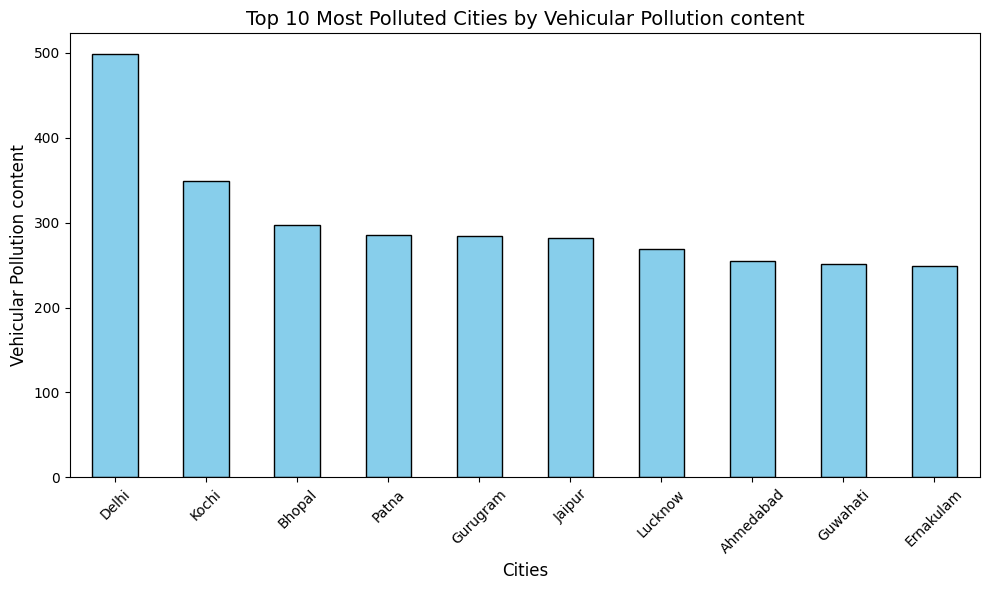

In [27]:
import matplotlib.pyplot as plt

def max_bar_plot_matplotlib(var):
    # Grouping, calculating median, sorting, and selecting top 10
    top_10 = df[['City', var]].groupby("City").median().sort_values(by=var, ascending=False).head(10)
    # Plot
    plt.figure(figsize=(10, 6))
    top_10[var].plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Top 10 Most Polluted Cities by {var}", fontsize=14)
    plt.xlabel('Cities', fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
max_bar_plot_matplotlib('Industrial Pollution content')
max_bar_plot_matplotlib('Vehicular Pollution content')


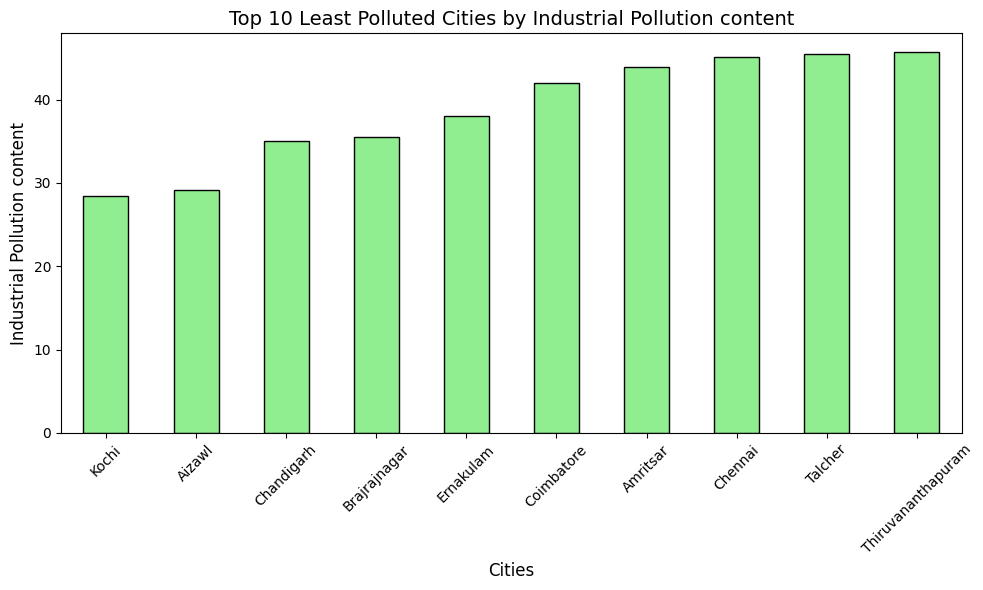

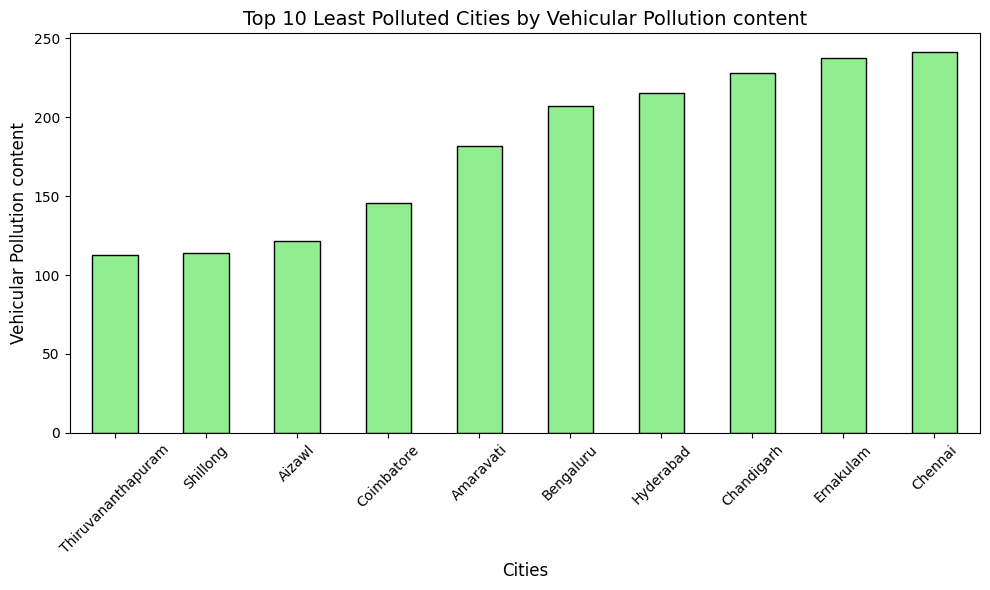

In [28]:
import matplotlib.pyplot as plt

def min_bar_plot_matplotlib(var):
    # Grouping, calculating mean, sorting, and selecting bottom 10
    bottom_10 = df[['City', var]].groupby("City").mean().sort_values(by=var, ascending=True).head(10)
    # Plot
    plt.figure(figsize=(10, 6))
    bottom_10[var].plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f"Top 10 Least Polluted Cities by {var}", fontsize=14)
    plt.xlabel('Cities', fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
min_bar_plot_matplotlib('Industrial Pollution content')
min_bar_plot_matplotlib('Vehicular Pollution content')


# Post-COVID

In [29]:
df = df1.copy()
df = df[df['Date'] > ('25-03-2020')]
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2548 entries, 1911 to 29530
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          2548 non-null   object        
 1   Date                          2548 non-null   datetime64[ns]
 2   AQI                           2548 non-null   float64       
 3   AQI_Bucket                    2548 non-null   object        
 4   Vehicular Pollution content   2548 non-null   float64       
 5   Industrial Pollution content  2548 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 139.3+ KB


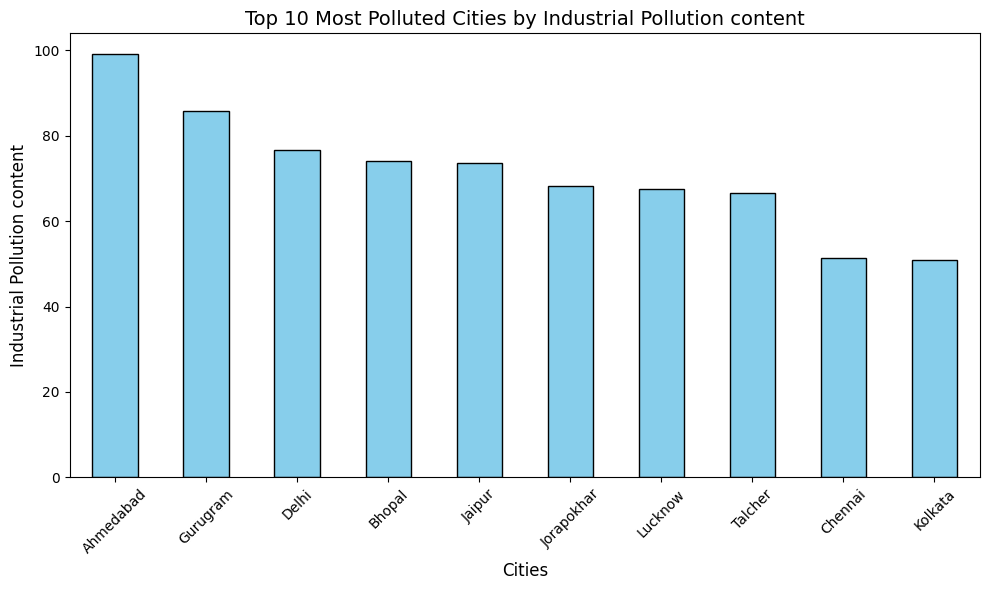

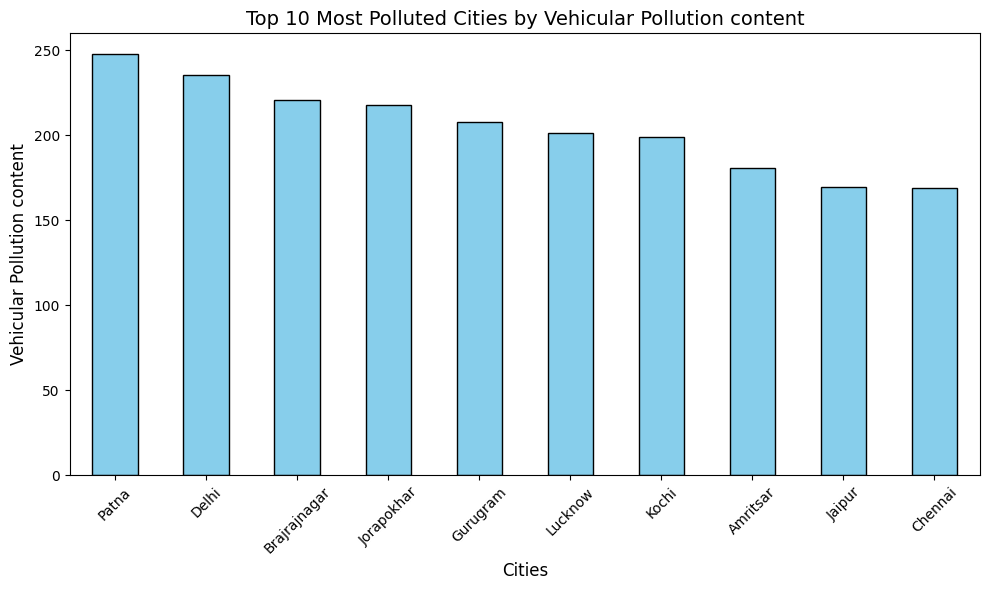

In [30]:
import matplotlib.pyplot as plt

def max_bar_plot_matplotlib(var):
    # Grouping, calculating median, sorting, and selecting top 10
    top_10 = df[['City', var]].groupby("City").median().sort_values(by=var, ascending=False).head(10)
    # Plot
    plt.figure(figsize=(10, 6))
    top_10[var].plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Top 10 Most Polluted Cities by {var}", fontsize=14)
    plt.xlabel('Cities', fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
max_bar_plot_matplotlib('Industrial Pollution content')
max_bar_plot_matplotlib('Vehicular Pollution content')


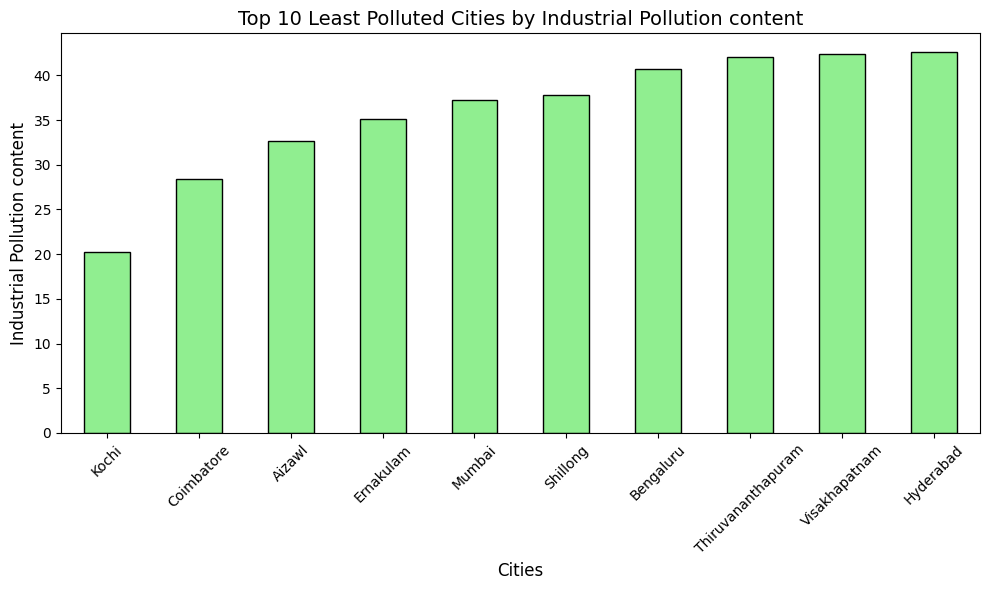

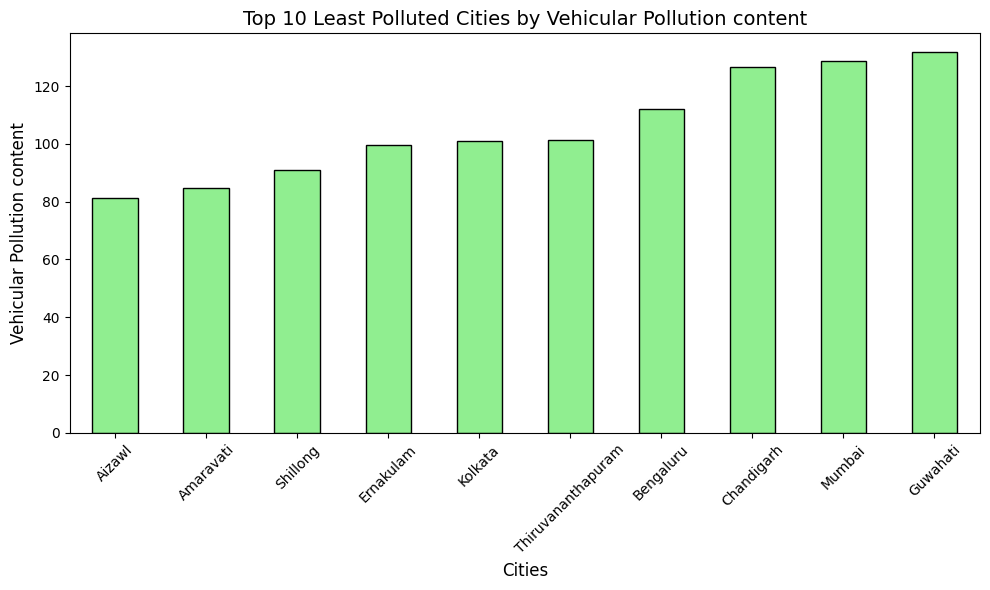

In [31]:
import matplotlib.pyplot as plt

def min_bar_plot_matplotlib(var):
    # Grouping, calculating mean, sorting, and selecting bottom 10
    bottom_10 = df[['City', var]].groupby("City").mean().sort_values(by=var, ascending=True).head(10)
    # Plot
    plt.figure(figsize=(10, 6))
    bottom_10[var].plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f"Top 10 Least Polluted Cities by {var}", fontsize=14)
    plt.xlabel('Cities', fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
min_bar_plot_matplotlib('Industrial Pollution content')
min_bar_plot_matplotlib('Vehicular Pollution content')


## Part4->Building ML model

In [32]:
df = df1.copy()
categorical_attributes = list(df.select_dtypes(include=['object']).columns)
categorical_attributes

['City', 'AQI_Bucket']

In [33]:
le=LabelEncoder()
df['City']=le.fit_transform(df['City'].astype(str))
df['AQI_Bucket']=le.fit_transform(df['AQI_Bucket'].astype(str))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  int64         
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-null  int64         
dtypes: datetime64[ns](1), 

In [34]:
y = df["AQI_Bucket"]
x = df[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [35]:
print('Classes and number of values in trainset',Counter(y_train))

Classes and number of values in trainset Counter({1: 10749, 3: 6650, 2: 2203, 5: 1854, 4: 1089, 0: 1079})


In [36]:
df.AQI_Bucket.unique()

array([1, 2, 5, 4, 3, 0])

In [37]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,1
1,0,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,1
2,0,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,1
3,0,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,1
4,0,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,1


### Data Imbalance:

Here we observe that target label is not splitted eqaully. This will cause data imbalance problem. In order to overcome this problem we use the technique called SMOTE(Synthetic Minority Oversampling Technique). This approach solve this problem by oversample the examples in the minority class.

In [38]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y_train))

Classes and number of values in trainset after SMOTE: Counter({3: 10749, 1: 10749, 2: 10749, 4: 10749, 0: 10749, 5: 10749})


### Setting up the model

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn imports
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier
)
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


In [40]:
def compare_models(X_train, X_test, y_train, y_test):
    """
    Train and compare multiple machine learning models
    """
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define models with hyperparameters
    models = {
        'Logistic Regression': LogisticRegression(multi_class='ovr', max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Extra Trees': ExtraTreesClassifier(random_state=42),
        'SVM': SVC(probability=True, random_state=42),
        'XGBoost': XGBClassifier(use_label_encoder=False, random_state=42),
        'Naive Bayes': GaussianNB()
    }

    # Results storage
    model_results = {}

    # Train and evaluate each model
    for name, model in models.items():
        # Fit the model
        model.fit(X_train_scaled, y_train)

        # Predict
        y_pred = model.predict(X_test_scaled)

        # Evaluate
        model_results[name] = evaluate_model(y_test, y_pred, name)

    # Create a summary DataFrame
    results_df = pd.DataFrame.from_dict(model_results, orient='index')
    results_df.sort_values('accuracy', ascending=False, inplace=True)

    # Plot model comparison
    plt.figure(figsize=(10, 6))
    results_df['accuracy'].plot(kind='bar')
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return results_df

In [41]:
def evaluate_model(y_true, y_pred, model_name):
    """
    Comprehensive model evaluation
    """
    print(f"\n--- {model_name} Evaluation Metrics ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision (Macro):", precision_score(y_true, y_pred, average='macro'))
    print("Recall (Macro):", recall_score(y_true, y_pred, average='macro'))
    print("F1 Score (Macro):", f1_score(y_true, y_pred, average='macro'))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig(f'{model_name.lower().replace(" ", "_")}_confusion_matrix.png')
    plt.close()

    # Classification Report
    print("\nDetailed Classification Report:")
    print(classification_report(y_true, y_pred))

    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='macro'),
        'recall': recall_score(y_true, y_pred, average='macro'),
        'f1_score': f1_score(y_true, y_pred, average='macro')
    }

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



--- Logistic Regression Evaluation Metrics ---
Accuracy: 0.7265955645843915
Precision (Macro): 0.7053051398356486
Recall (Macro): 0.7940548760140969
F1 Score (Macro): 0.7383028838679282

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.66      1.00      0.80       262
           1       0.86      0.68      0.76      2761
           2       0.42      0.64      0.51       578
           3       0.71      0.76      0.74      1574
           4       0.90      0.99      0.95       249
           5       0.67      0.70      0.68       483

    accuracy                           0.73      5907
   macro avg       0.71      0.79      0.74      5907
weighted avg       0.76      0.73      0.73      5907


--- Decision Tree Evaluation Metrics ---
Accuracy: 1.0
Precision (Macro): 1.0
Recall (Macro): 1.0
F1 Score (Macro): 1.0

Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00     

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:09:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- XGBoost Evaluation Metrics ---
Accuracy: 0.9925512104283054
Precision (Macro): 0.9925324087642627
Recall (Macro): 0.9936263966162148
F1 Score (Macro): 0.9930567077955629

Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       262
           1       1.00      0.99      0.99      2761
           2       0.99      1.00      1.00       578
           3       0.99      0.99      0.99      1574
           4       0.98      1.00      0.99       249
           5       1.00      0.98      0.99       483

    accuracy                           0.99      5907
   macro avg       0.99      0.99      0.99      5907
weighted avg       0.99      0.99      0.99      5907


--- Naive Bayes Evaluation Metrics ---
Accuracy: 0.8115794819705434
Precision (Macro): 0.7194882094068921
Recall (Macro): 0.8351848126112249
F1 Score (Macro): 0.7563347701960774

Detailed Classification Report:
              precision    recall  f1

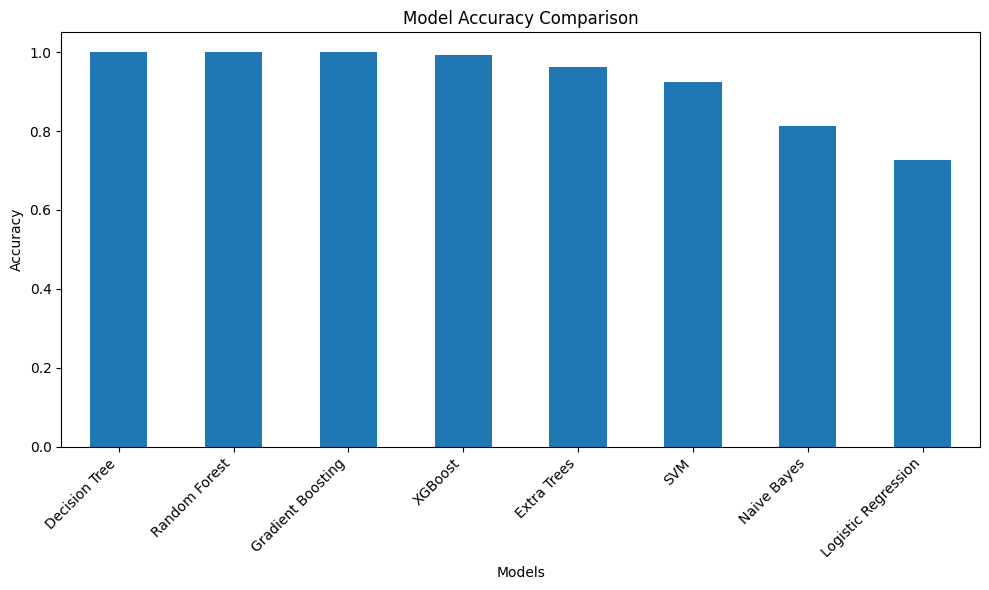

In [42]:
# Compare models
model_comparison_results = compare_models(X_train, X_test, y_train, y_test)

In [43]:
# ROC Curve for Multi-class Classification
def plot_roc_curve(X_test, y_test, models):
    """
    Plot ROC curves for multi-class classification
    """
    plt.figure(figsize=(10, 8))

    for name, model in models.items():
        # One-vs-Rest ROC
        y_score = model.predict_proba(X_test)

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for i in range(len(np.unique(y_test))):
            fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
            roc_auc[i] = roc_auc_score(y_test == i, y_score[:, i])

        # Plot ROC curve
        plt.plot(fpr[1], tpr[1], label=f'{name} (area = {roc_auc[1]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:09:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


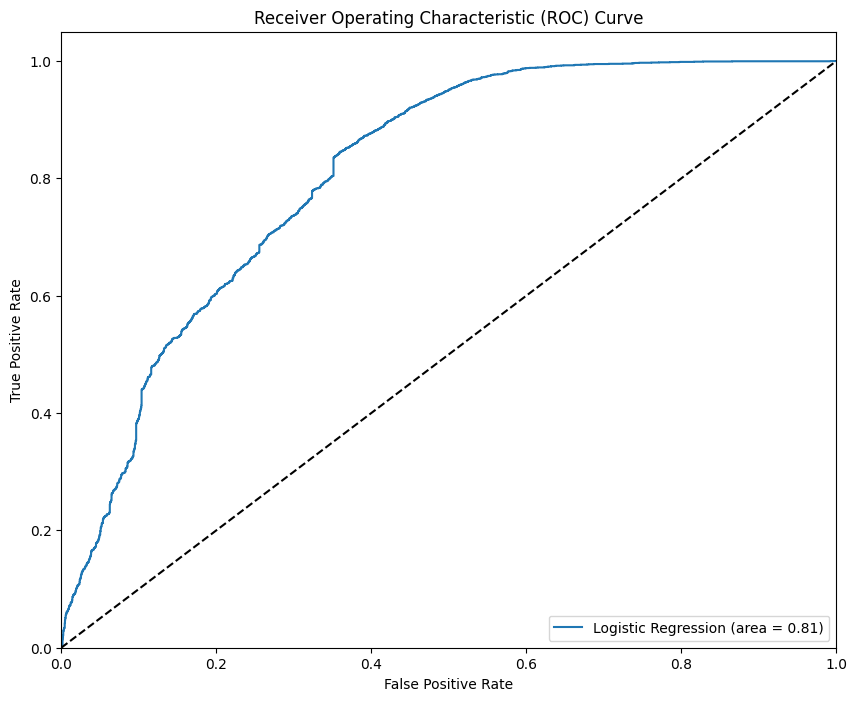

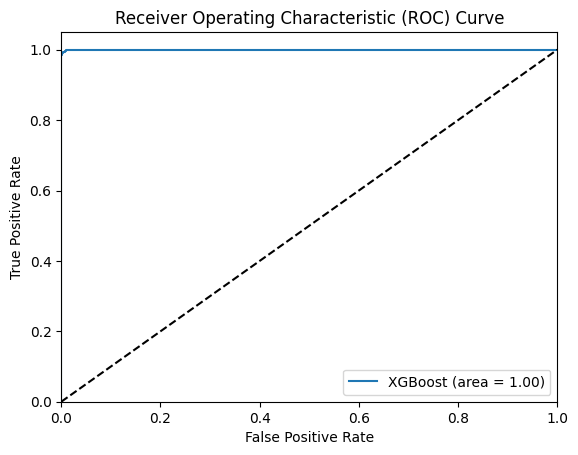

In [44]:
# Train models
trained_models = {}
models = {
    'Logistic Regression': LogisticRegression(multi_class='ovr', max_iter=1000),
    # 'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    # 'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, random_state=42),
}

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model

# Plot ROC curves
plot_roc_curve(X_test_scaled, y_test, trained_models)

## Part-7 Conclusion

### **Analysis of Air Pollution Pre- and Post-COVID Lockdown**

#### **Pre-COVID Lockdown Insights**
- **Highest Pollution Levels**:
  - **Industrial Pollution**: Ahmedabad recorded the highest industrial pollution levels.  
  - **Vehicular Pollution**: Delhi topped the charts for vehicular pollution, reflecting its high population density and traffic volume.  

- **Lowest Pollution Levels**:
  - **Industrial Pollution**: Thiruvananthapuram reported the lowest levels of industrial pollutants, likely due to limited industrial activity.  
  - **Vehicular Pollution**: Chennai exhibited the lowest vehicular pollution, potentially due to better traffic management or cleaner fuel initiatives.  

- **Air Quality Satisfaction**:
  - Most cities reported air quality in the "Moderate" category, indicating room for improvement in pollution control efforts.  

---

#### **Post-COVID Lockdown Insights**
- **Highest Pollution Levels**:
  - **Industrial Pollution**: Ahmedabad remained the leader in industrial pollution, underscoring the region's dense industrial activities.  
  - **Vehicular Pollution**: Patna showed the highest vehicular pollution, likely linked to increased vehicle usage as restrictions eased.  

- **Lowest Pollution Levels**:
  - **Industrial Pollution**: Hyderabad emerged with the lowest industrial pollution, reflecting better industrial control or minimal heavy industry.  
  - **Vehicular Pollution**: Guwahati saw the lowest vehicular pollution, possibly due to lower traffic volumes or smaller urban size.  

- **Air Quality Satisfaction**:
  - A majority of cities experienced "Satisfactory" air quality, highlighting a positive impact of reduced human activity during the lockdown.  

---

#### **Overall Observations**
- **Vehicular Pollution**: A gradual decline was observed post-COVID lockdown, reflecting the reduced traffic during restricted movement phases.  
- **Industrial Pollution**: Significant reductions in industrial pollution were noted, likely attributed to halted or reduced factory operations during lockdowns.  

---

This analysis highlights the substantial positive impact of the COVID-19 lockdown on air quality, emphasizing the need for sustained policies aimed at reducing pollution from both vehicular and industrial sources.